In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
regiones = ['Arica y Parinacota' , 'Valparaiso' , 'Atacama' , 'Antofagasta' , 'Tarapaca' , 'Coquimbo' , 'De La Araucania' , 'Metropolitana de Santiago' , 'Del Libertador Gral. Bernardo O\'Higgins' , 'Del Maule' , 'De Nuble' , 'Del Biobio' , 'De Los Lagos' , 'De Los Rios' , 'Aisen del Gral. Carlos Ibanez del Campo' , 'Magallanes y de la Antartica Chilena']

In [3]:
precipitcsv = {i: pd.read_csv('Datos_precipit_regionales/'+i+'.csv') for i in regiones}
tempcsv = {i: pd.read_csv('Datos_temp_regionales/'+i+'.csv') for i in regiones}

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
annio = 2000 #No hay problema cambiando el año. Acorde a los requisitos el programa puede adaptarse a una lista de años.

tempannio = {}
precipitannio = {}

for n in regiones:
     precipitannio[n] = []
     tempannio[n] = []
for p in range(0,16):
     for n in range(1,13):
          #Primero seleccionar los datos por año, luego cambiar 'sin precipitaciones' por 0.
          holder = precipitcsv[regiones[p]][(precipitcsv[regiones[p]]['Annio'] == annio) & (precipitcsv[regiones[p]]['Mes'] == n)]
          holder = holder.replace(to_replace= 's/p', value=0.0)
          holder = holder.fillna(method='ffill')
          #Workaround para calcular promedios con datos Str. Pandas debe tener alguna alternativa más elegante.
          sum=0
          for b in range(0,len(holder)):
               sum = sum+float(holder.iloc[b,8])
          if len(holder) > 0:
               mean=sum/len(holder)
          else:
               mean=0
          precipitannio[regiones[p]].append(mean)

    


In [5]:
promediostemp = [18.8 , 14.8 , 16.1, 18.7 , 18.1, 14.1 , 11.4, 13.9, 15.2, 19.0 , 14.0 , 12.9, 10.6, 11.4, 8.5, 6.0, 6.5]
for p in range(0,16):
    for n in range(1,13):
        holder = tempcsv[regiones[p]][(tempcsv[regiones[p]]['Annio'] == annio) & (tempcsv[regiones[p]]['Mes'] == n)]
        holder = holder.replace(to_replace= '.', value=np.nan)
        #Los datos faltantes serán el promedio anual. Sería bien visto recolectarlos directamente de internet.
        holder = holder.fillna(value=18.8)
        sum=0
        for b in range(0,len(holder)):
            sum = sum+float(holder.iloc[b,5])
        if len(holder) > 0:
            mean=sum/len(holder)
        else:
            mean=0
        tempannio[regiones[p]].append(mean)
    

In [6]:
meses = [i for i in range(1,13)]

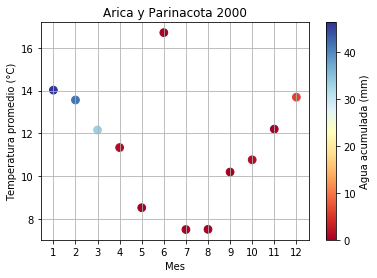

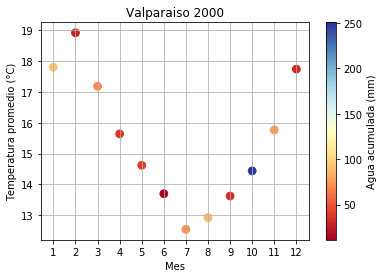

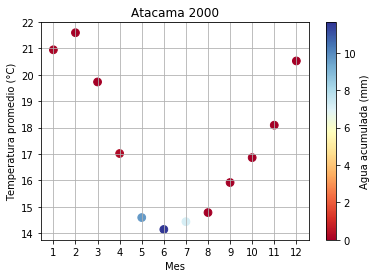

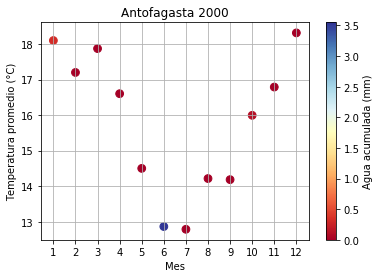

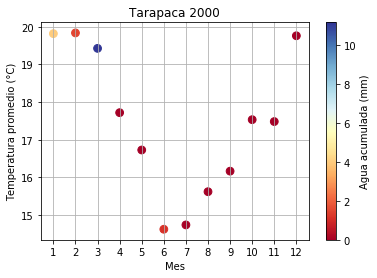

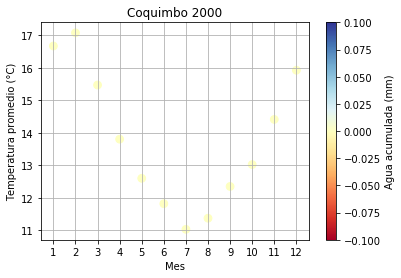

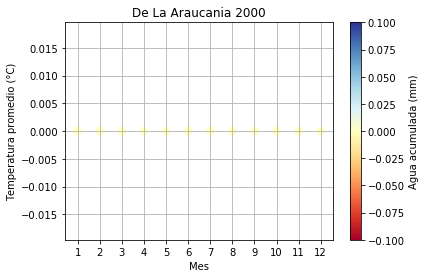

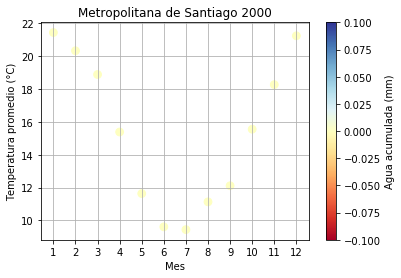

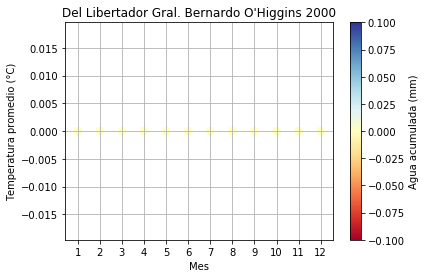

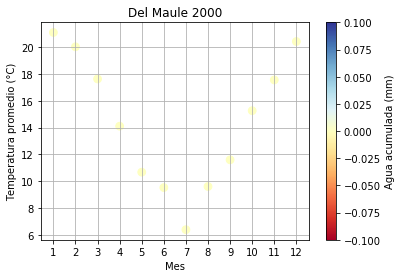

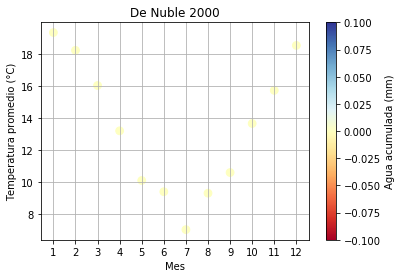

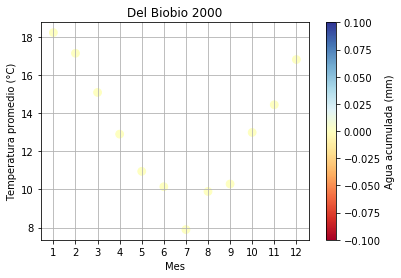

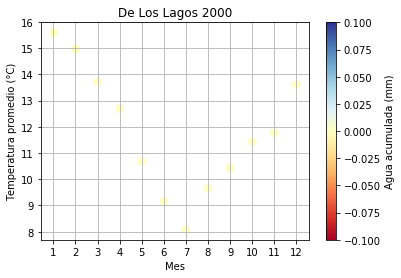

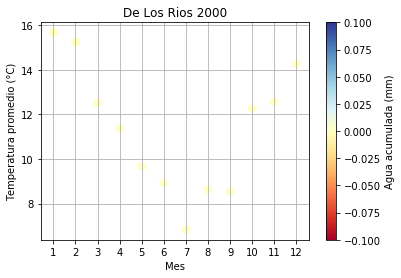

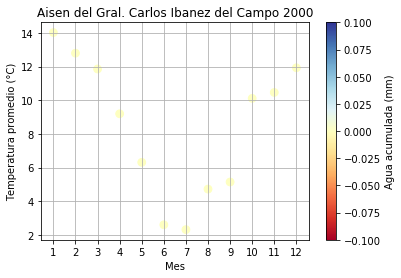

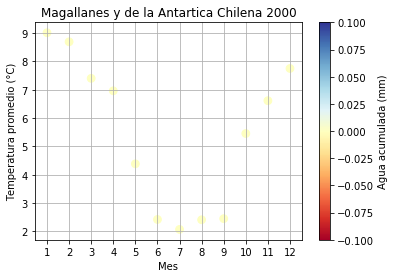

In [7]:

figures = []
for k in range(0,16):
    f=plt.figure()
    plt.xlabel('Mes')
    plt.ylabel('Temperatura promedio (°C)')   
    xd = plt.scatter(y=tempannio[regiones[k]],x=meses,c=precipitannio[regiones[k]],cmap='RdYlBu',s=60)
    plt.title(regiones[k]+' '+str(annio))
    plt.grid(True)
    plt.xticks(meses)   
    plt.colorbar(xd,label='Agua acumulada (mm)')
    figures+=[f]
    os.makedirs('plots/plots'+str(annio), exist_ok=True)
    plt.savefig('plots/plots'+str(annio)+'/'+regiones[k]+'.pdf')

